In [227]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf

## Read in Data
#### Data is from Stanford's CS20 course notes on GitHub.
https://github.com/chiphuyen/stanford-tensorflow-tutorials

In [166]:
df = pd.read_csv('./data/birth_life_2010.csv')
df.head()

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [167]:
# Style plot.
plt.style.use('ggplot')

### Visualize Data 
Given the a countries birth rate the model will return that countries life expectancy.

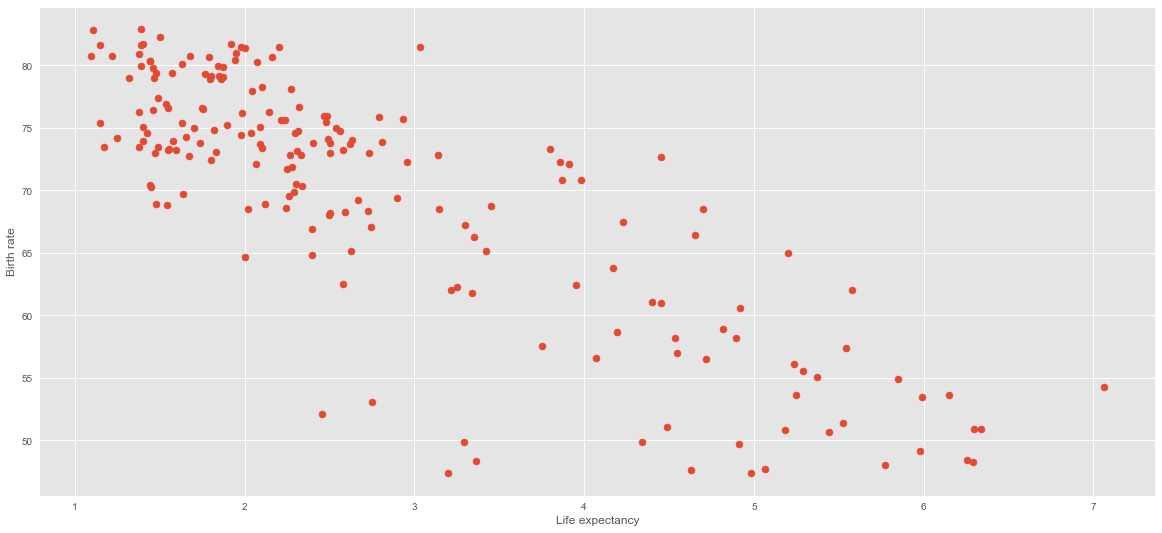

In [168]:
plt.figure(figsize=(20,9))
plt.xlabel('Life expectancy')
plt.ylabel('Birth rate')
plt.scatter(df['Birth rate'], df['Life expectancy'])
plt.show()

### Put data into array for Machine Learning 

In [169]:
input_X = df['Birth rate'].as_matrix().reshape(-1, 1)
# print(input_X)

In [170]:
input_Y = df['Life expectancy'].as_matrix().reshape(-1,1)
# print(input_Y)

### Build Neural Network

In [217]:
# Hyperparameters
learning_rate = 0.2
epochs = 2000
batch_size = 25

In [218]:
X = tf.placeholder(tf.float32, shape=(None, 1))
Y = tf.placeholder(tf.float32, shape=(None, 1))

# create weight
w = tf.Variable(tf.zeros([1, 1]), name='Weight')

# create bias
b = tf.Variable(tf.random_normal([1]), name='Bias')

Y_hat = tf.matmul(X, w) + b

loss = tf.reduce_mean(tf.square(Y_hat - Y))

In [219]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

### Training

In [220]:
sess = tf.Session()

with sess.as_default():
    # initialize 
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./house', sess.graph)

    
#training 
for i in range(epochs):

    sess.run([optimizer], 
              feed_dict = {
              X: input_X, 
              Y: input_Y
            })

    
    if (i) % 5 == 0:
        cc = sess.run(loss, feed_dict={ X: input_X, Y: input_Y})
        
        print(f'Epochs: {i}/{epochs}', 'Loss:', '{:.9f}'.format(cc))
print('Optimization Finished!')
training_loss = sess.run(loss, feed_dict={ X: input_X, Y: input_Y })
print('Final Loss: ', training_loss, 'Final Weight: ', sess.run(w), 'Bias =', sess.run(b))     

writer.close()

Epochs: 0/2000 Loss: 4663.116210938
Epochs: 5/2000 Loss: 4189.054199219
Epochs: 10/2000 Loss: 3751.518310547
Epochs: 15/2000 Loss: 3352.294189453
Epochs: 20/2000 Loss: 2992.257568359
Epochs: 25/2000 Loss: 2671.343750000
Epochs: 30/2000 Loss: 2388.603759766
Epochs: 35/2000 Loss: 2142.327392578
Epochs: 40/2000 Loss: 1930.203491211
Epochs: 45/2000 Loss: 1749.486816406
Epochs: 50/2000 Loss: 1597.162231445
Epochs: 55/2000 Loss: 1470.085083008
Epochs: 60/2000 Loss: 1365.104980469
Epochs: 65/2000 Loss: 1279.162597656
Epochs: 70/2000 Loss: 1209.365966797
Epochs: 75/2000 Loss: 1153.046020508
Epochs: 80/2000 Loss: 1107.793579102
Epochs: 85/2000 Loss: 1071.480468750
Epochs: 90/2000 Loss: 1042.264282227
Epochs: 95/2000 Loss: 1018.583251953
Epochs: 100/2000 Loss: 999.139221191
Epochs: 105/2000 Loss: 982.876098633
Epochs: 110/2000 Loss: 968.951477051
Epochs: 115/2000 Loss: 956.707824707
Epochs: 120/2000 Loss: 945.643005371
Epochs: 125/2000 Loss: 935.381103516
Epochs: 130/2000 Loss: 925.648132324
Epo

Epochs: 1140/2000 Loss: 40.230125427
Epochs: 1145/2000 Loss: 39.894104004
Epochs: 1150/2000 Loss: 39.568191528
Epochs: 1155/2000 Loss: 39.252124786
Epochs: 1160/2000 Loss: 38.945655823
Epochs: 1165/2000 Loss: 38.648529053
Epochs: 1170/2000 Loss: 38.360534668
Epochs: 1175/2000 Loss: 38.081356049
Epochs: 1180/2000 Loss: 37.810810089
Epochs: 1185/2000 Loss: 37.548652649
Epochs: 1190/2000 Loss: 37.294662476
Epochs: 1195/2000 Loss: 37.048610687
Epochs: 1200/2000 Loss: 36.810291290
Epochs: 1205/2000 Loss: 36.579479218
Epochs: 1210/2000 Loss: 36.355987549
Epochs: 1215/2000 Loss: 36.139617920
Epochs: 1220/2000 Loss: 35.930149078
Epochs: 1225/2000 Loss: 35.727409363
Epochs: 1230/2000 Loss: 35.531200409
Epochs: 1235/2000 Loss: 35.341339111
Epochs: 1240/2000 Loss: 35.157627106
Epochs: 1245/2000 Loss: 34.979904175
Epochs: 1250/2000 Loss: 34.808013916
Epochs: 1255/2000 Loss: 34.641799927
Epochs: 1260/2000 Loss: 34.481079102
Epochs: 1265/2000 Loss: 34.325679779
Epochs: 1270/2000 Loss: 34.175453186
E

## Linear Regression Model 

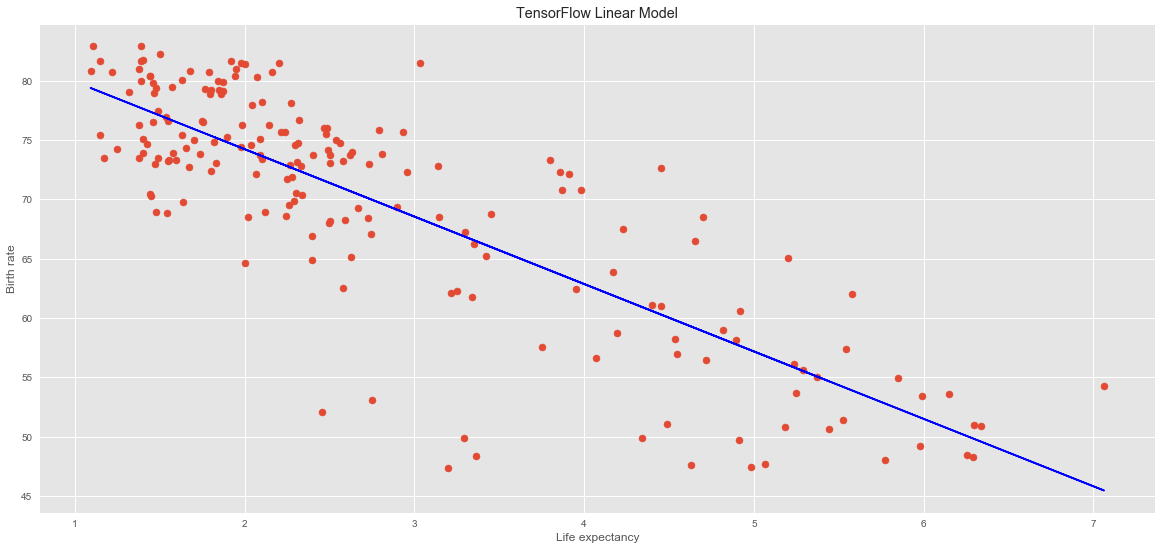

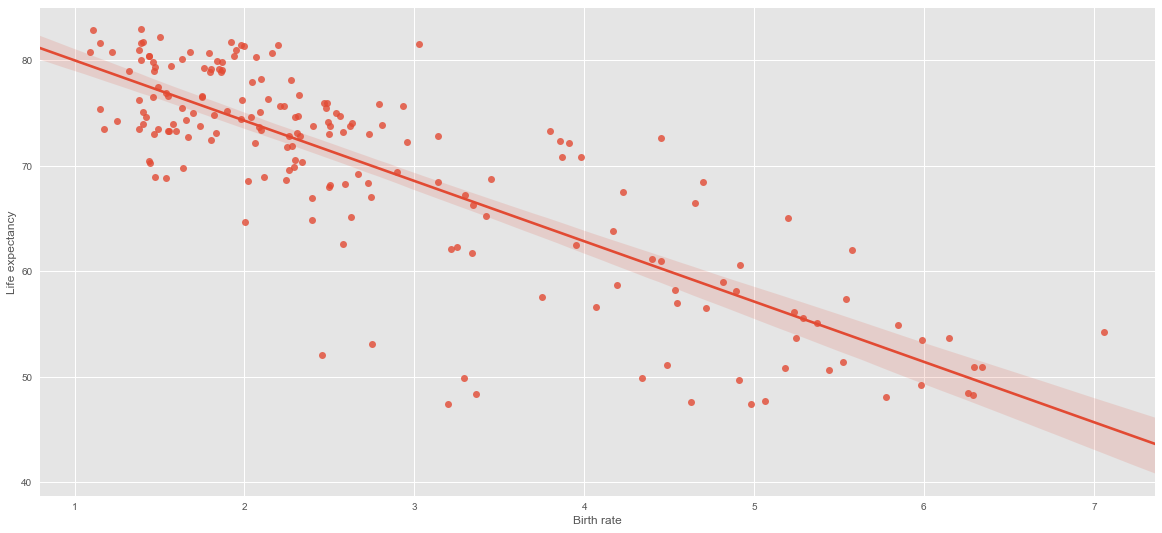

In [221]:
plt.figure(figsize=(20,9))
plt.title('TensorFlow Linear Model')
plt.xlabel('Life expectancy')
plt.ylabel('Birth rate')
plt.scatter(df['Birth rate'], df['Life expectancy'])
plt.plot(input_X,sess.run(w) * input_X + sess.run(b), c='b')
plt.show()

plt.figure(figsize=(20,9))
# Plot data and a linear regression model fit.
sns.regplot(df['Birth rate'], df['Life expectancy'])
plt.show()

### Make Prediction
#### What if the Birth rate of some country was 3.821 what would are model predict?

In [210]:
sess.run(Y_hat, feed_dict={X:[[3.821]]})

array([[63.861908]], dtype=float32)